In [1]:
import csv
import numpy as np
from matplotlib import pyplot as plt
import os
from time import time
os.chdir('Data')

In [2]:
def getData():
        with open("data.csv", 'r') as file:
            read = csv.reader(file)
            data = [i for i in read]
        for i in data:
            if i[1] == "Product B ":
                i[1] = "Product B"
            elif i[1] == "Product A ":
                i[1] = "Product A"
        return data

In [3]:
titles = [getData()[0][i] for i in range(len(getData()[0]))]
[str(i)+ ":" +getData()[0][i] for i in range(len(getData()[0]))]

['0:Segment',
 '1:Product',
 '2:Date',
 '3:Quantity',
 '4:Unique Purchases',
 '5:Avg. Price',
 '6:Product Revenue',
 '7:Avg. QTY',
 '8:Redistributed Price',
 '9:Days since Day 1']

In [4]:
def stats(data, column):
    dat = []
    for i in data:
        try:
            dat.append(float(i[column]))
        except:
            pass
    return np.std(dat), np.mean(dat)

In [5]:
def getPeriod(data, date, days):
    outp = []
    if data[0][0] == "Segment":
        del data[0]
    for i in data:
        if -days <= int(i[9])-int(date) <= days:
            outp.append(i)
        elif int(i[9]) - int(date) > days:
            break
    return outp

In [6]:
def getBounds(data, days, column):
    upperBound, lowerBound = [], []
    outliers = []
    for i in data:
        dev, mean = stats(getPeriod(data, i[9], days), column)
        upperBound.append(mean+2*dev)
        lowerBound.append(0 if mean-2*dev < 0 else mean-2*dev)
        if not(-2*dev <= float(i[column]) - mean <= 2*dev):
            outliers.append(i)
    return upperBound, lowerBound, outliers

In [38]:
days = 7
column = 3

segment = ["W","X","Y","Z"]
product = ["Product A", "Product B"]
data = np.array([i for i in getData() if i[0] in segment and i[1] in product])
#for i in range(len(data)):
#    try:
#        data[i, column] = float(data[i, column])
#    except:
#        data[i, column] = data[i-1, column]
fig = plt.figure(figsize=[30,15])
ax = fig.gca()
ax.plot(data[:, column], linewidth=2, c="k")
ub,lb,ot = getBounds(data, (days-1)//2, column)
ax.fill_between(range(len(ub)),np.array(ub),np.array(lb), color="C0")
plt.title(product[0]+"; "+segment[0])
plt.grid()
plt.show()
plt.close(fig)
print(len(ot))

KeyboardInterrupt: 

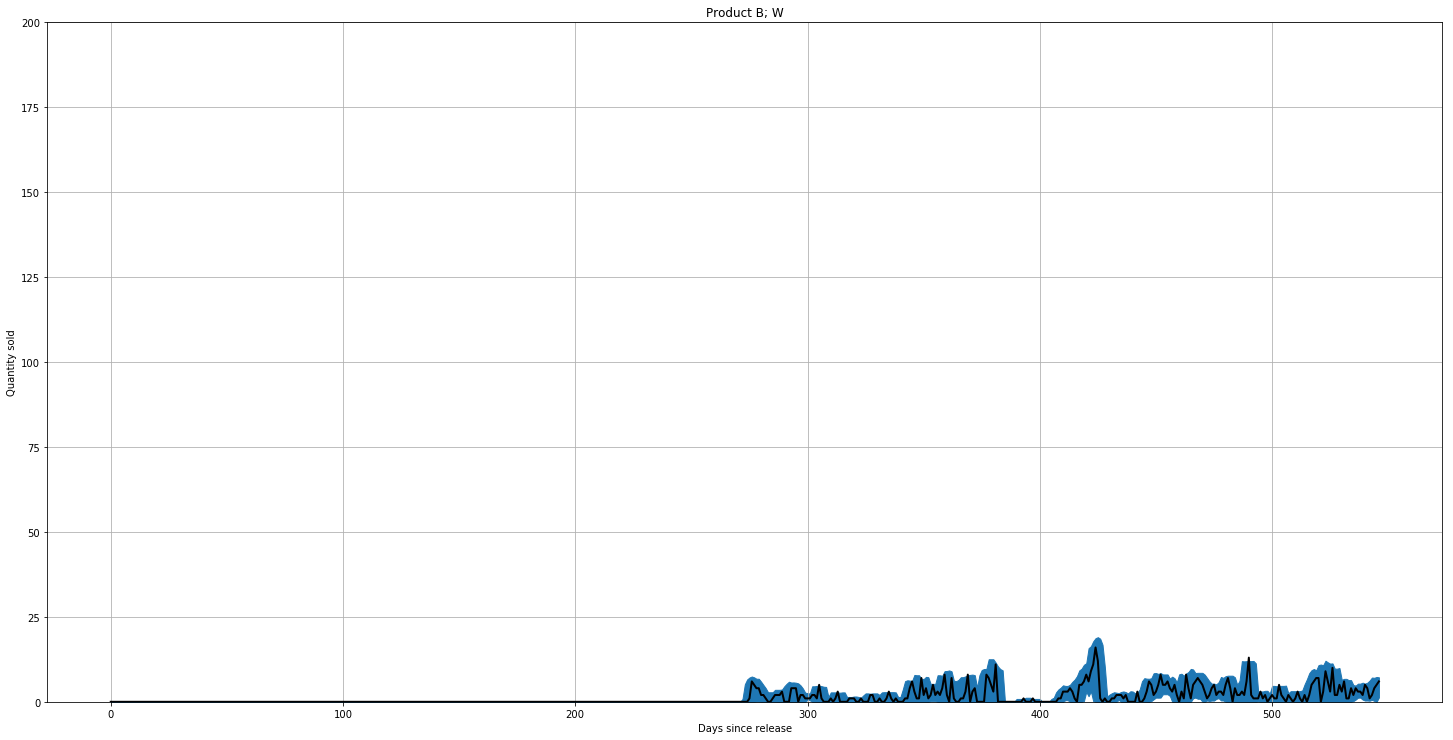

[['W' 'Product B' '02/10/2016' '5' '5' '889.63' '4448.17' '1' '889.63'
  '306']
 ['W' 'Product B' '10/10/2016' '3' '3' '657.28' '1971.84' '1' '657.28'
  '314']
 ['W' 'Product B' '01/11/2016' '3' '3' '946.42' '2839.26' '1' '946.42'
  '336']
 ['W' 'Product B' '15/11/2016' '7' '7' '712.52' '4987.67' '1' '712.52'
  '350']
 ['W' 'Product B' '05/12/2016' '8' '8' '753.57' '6028.57' '1' '753.57'
  '370']
 ['W' 'Product B' '29/12/2016' '1' '1' '946.42' '946.42' '1' '946.42' '394']
 ['W' 'Product B' '02/01/2017' '1' '1' '804.46' '804.46' '1' '804.46' '398']
 ['W' 'Product B' '16/02/2017' '3' '3' '946.42' '2839.26' '1' '946.42'
  '443']
 ['W' 'Product B' '05/04/2017' '13' '10' '1010.54' '10105.44' '1.3'
  '777.34' '491']
 ['W' 'Product B' '18/04/2017' '5' '5' '899.1' '4495.5' '1' '899.1' '504']]


In [8]:
days = 7
column = 3
        
for j in range(1):
    for i in range(1):
        segment = [["W","X","Y","Z"][i]]
        product = [["Product A", "Product B"][j+1]]
        data = np.array([i for i in getData() if i[0] in segment and i[1] in product])[1:]
        #for i in range(len(data)):
        #    try:
        #        data[i, column] = float(data[i, column])
        #    except:
        #        data[i, column] = data[i-1, column]
        fig = plt.figure(figsize=[25,12.5])
        fig.patch.set_facecolor('white')
        #ax.set_facecolor((230/255,235/255,238/255))
        ax = fig.gca()
        ax.plot(data[:, column], linewidth=2, c="k")
        ub,lb,ot = getBounds(data, (days-1)//2, column)
        ax.fill_between(range(len(ub)),np.array(ub),np.array(lb), color=["C0","orange","green","red"][i])
        #if j == 0 and i < 2:
        #    plt.ylim(0,400)
        #else:
        #    plt.ylim(0,35)
        plt.ylim(0,200)
        plt.title(product[0]+"; "+segment[0])
        plt.xlabel("Days since release")
        plt.ylabel("Quantity sold")
        plt.grid()
        plt.show()
        plt.close(fig)
        print(np.array(ot))

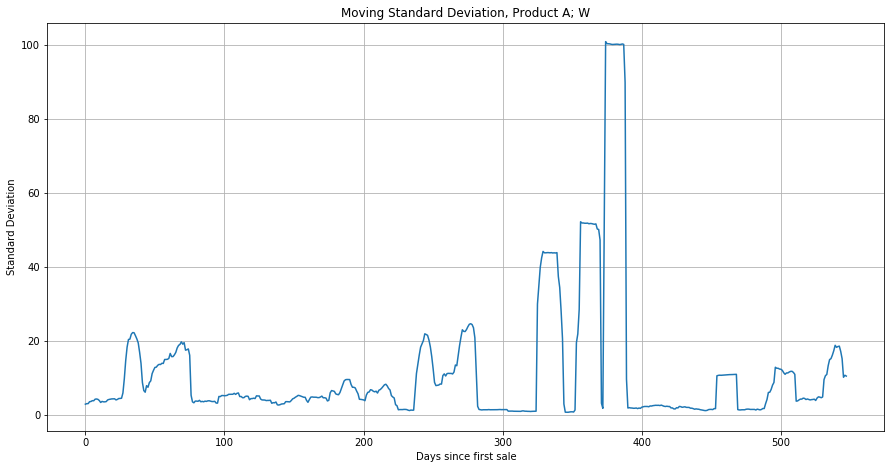

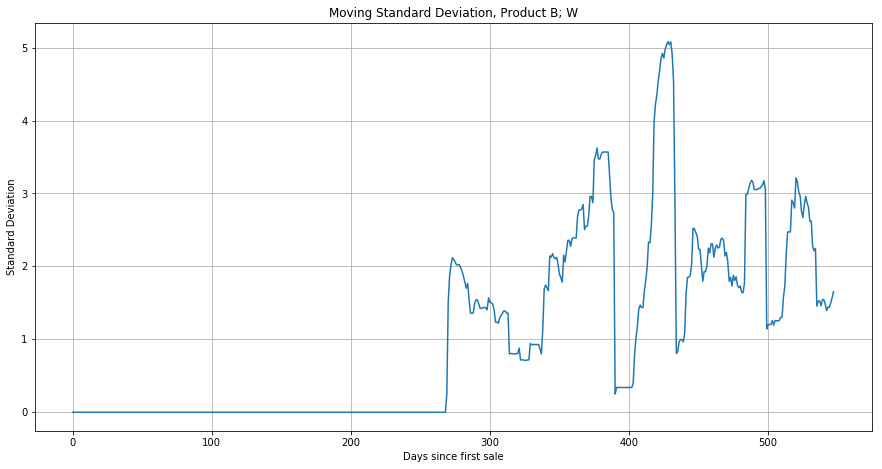

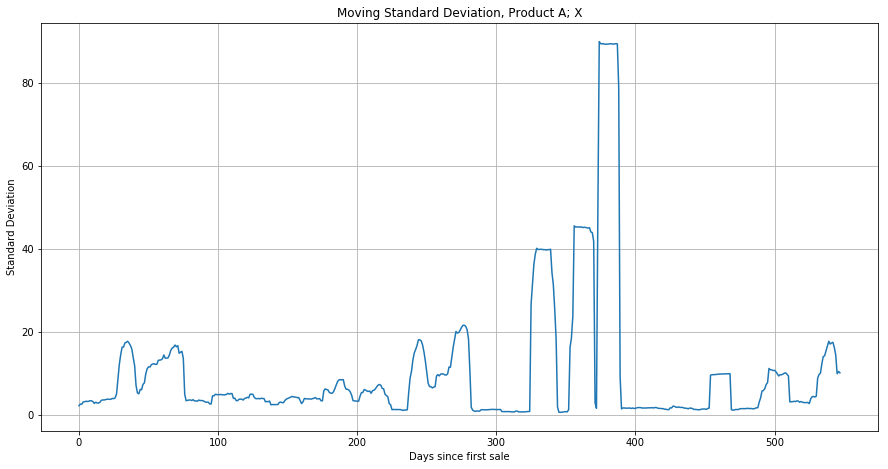

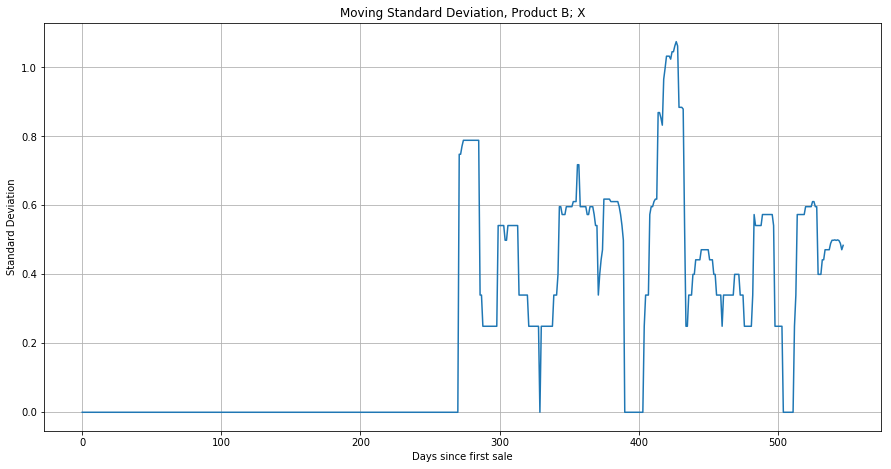

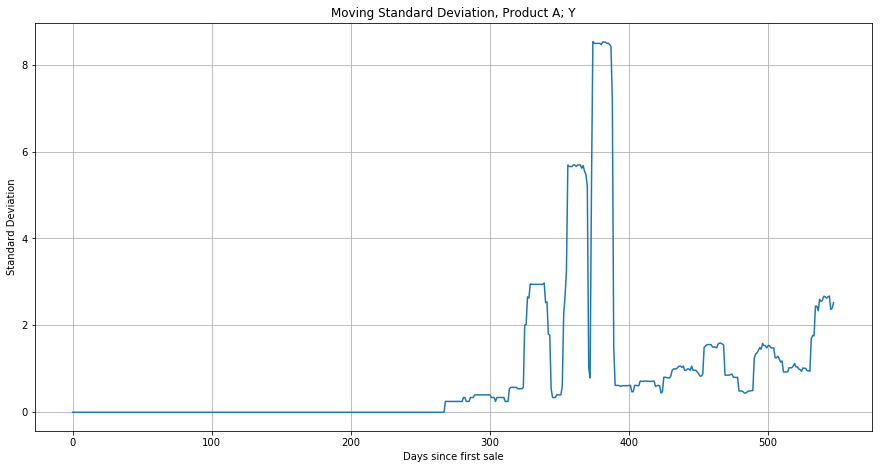

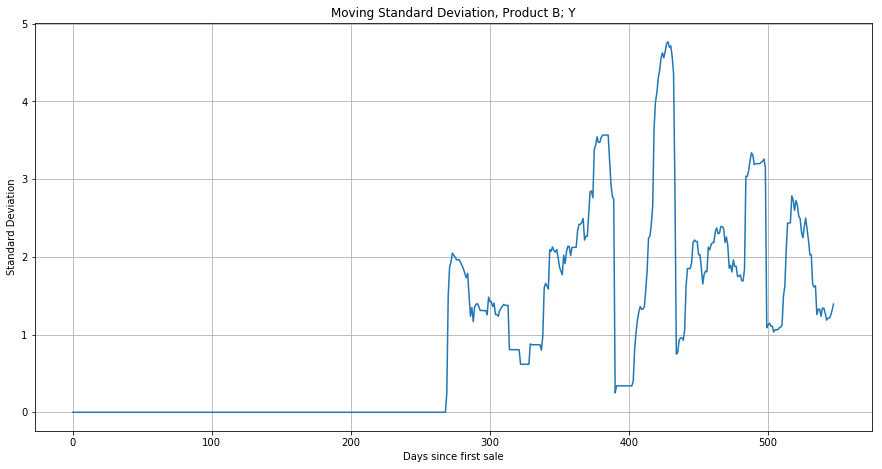

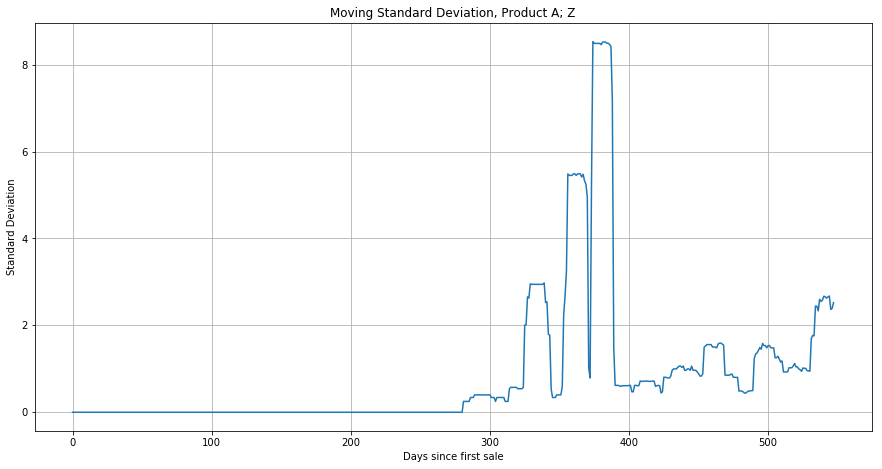

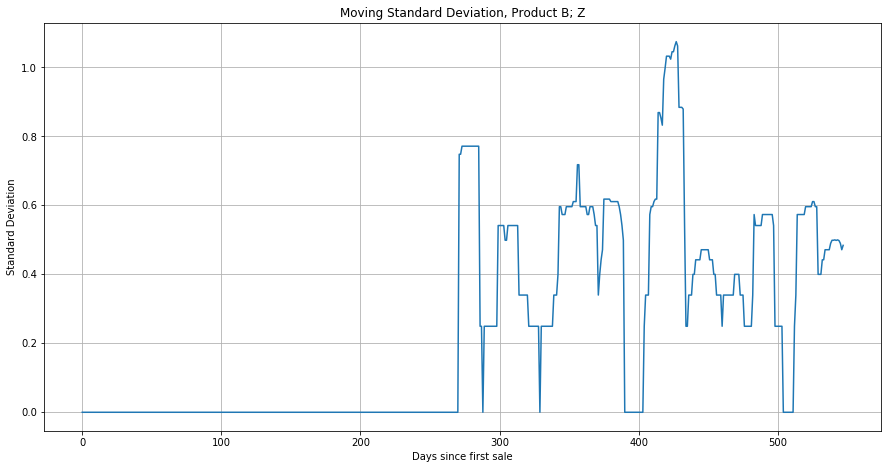

In [57]:
for k in range(4):
    for j in range(2):
        days = 7
        column = 3
        segment = [["W","X","Y","Z"][k]]
        product = [["Product A", "Product B"][j]]
        data = np.array([i for i in getData() if i[0] in segment and i[1] in product])
        #for i in range(len(data)):
        #    try:
        #        data[i, column] = float(data[i, column])
        #    except:
        #        data[i, column] = data[i-1, column]
        fig = plt.figure(figsize=[15,7.5])
        fig.patch.set_facecolor('white')
        ax = fig.gca()
        outp = []
        for i in data:
            dev, mean = stats(getPeriod(data, i[9], days), column)
            outp.append((dev,mean))
        
        mean, dev = np.array(outp)[:, 1], np.array(outp)[:, 0]
        ax.plot(data[:, 9], dev, label="Standard deviation")
        #ax.plot(data[:, 9], mean, label="Mean")

        #plt.legend()
        plt.title("Moving Standard Deviation, "+product[0]+"; "+segment[0])
        plt.xlabel("Days since first sale")
        plt.ylabel("Standard Deviation")

        plt.grid()
        plt.show()
        plt.close(fig)

In [7]:

for i in range(4):
    for j in range(2):
        segment = [["W","X","Y","Z"][i]]
        product = [["Product A", "Product B"][j]]
        data = np.array([i for i in getData() if i[0] in segment and i[1] in product])
        l = len(data)
        data = list(data)
        while data[0][3] == "0":
            del data[0]
        data = np.array(data)
        print(product[0]+":", segment[0])
        print(np.std(data[:, 3].astype(np.float)))

Product A: W
25.5802896276
Product B: W
2.66825662664
Product A: X
22.6161943716
Product B: X
0.563888128686
Product A: Y
2.95203553729
Product B: Y
2.52410524076
Product A: Z
2.98779321306
Product B: Z
0.562292485728


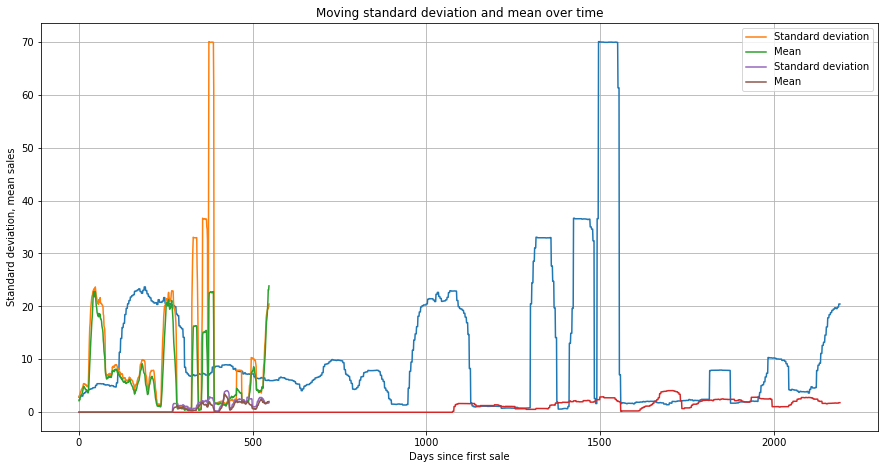

In [14]:
days = 7
column = 3
segment = ["W","X","Y","Z"]
product = ["Product A", "Product B"]
#for i in range(len(data)):
#    try:
#        data[i, column] = float(data[i, column])
#    except:
#        data[i, column] = data[i-1, column]
fig = plt.figure(figsize=[15,7.5])
fig.patch.set_facecolor('white')
ax = fig.gca()

for product in ["Product A", "Product B"]:
    data = np.array([i for i in getData() if i[0] in segment and i[1] in product])
    outp = []
    for i in data:
        dev, mean = stats(getPeriod(data, i[9], days), column)
        outp.append((dev,mean))
    ax.plot(np.array(outp)[:, 0])

    mean, dev = np.array(outp)[:, 1], np.array(outp)[:, 0]
    ax.plot(data[:, 9], dev, label="Standard deviation")
    ax.plot(data[:, 9], mean, label="Mean")

plt.legend()
plt.title("Moving standard deviation and mean over time")
plt.xlabel("Days since first sale")
plt.ylabel("Standard deviation, mean sales")

plt.grid()
plt.show()
plt.close(fig)

In [37]:
ls = [[0,0],[0,0]]
w = 0
for i in getData()[1:]:
    if i[1] == "Product B" and w == 0 and float(i[3]) > 0:
        w = 1
        print(i[2])
        print(i[9])
    if i[1] == "Product B":
        ls[w][1] += float(i[6])
    else:
        ls[w][0] += float(i[6])
ls

02/09/2016
276


[[5819569.250000002, 0.0], [3521369.570000006, 1183461.610000002]]

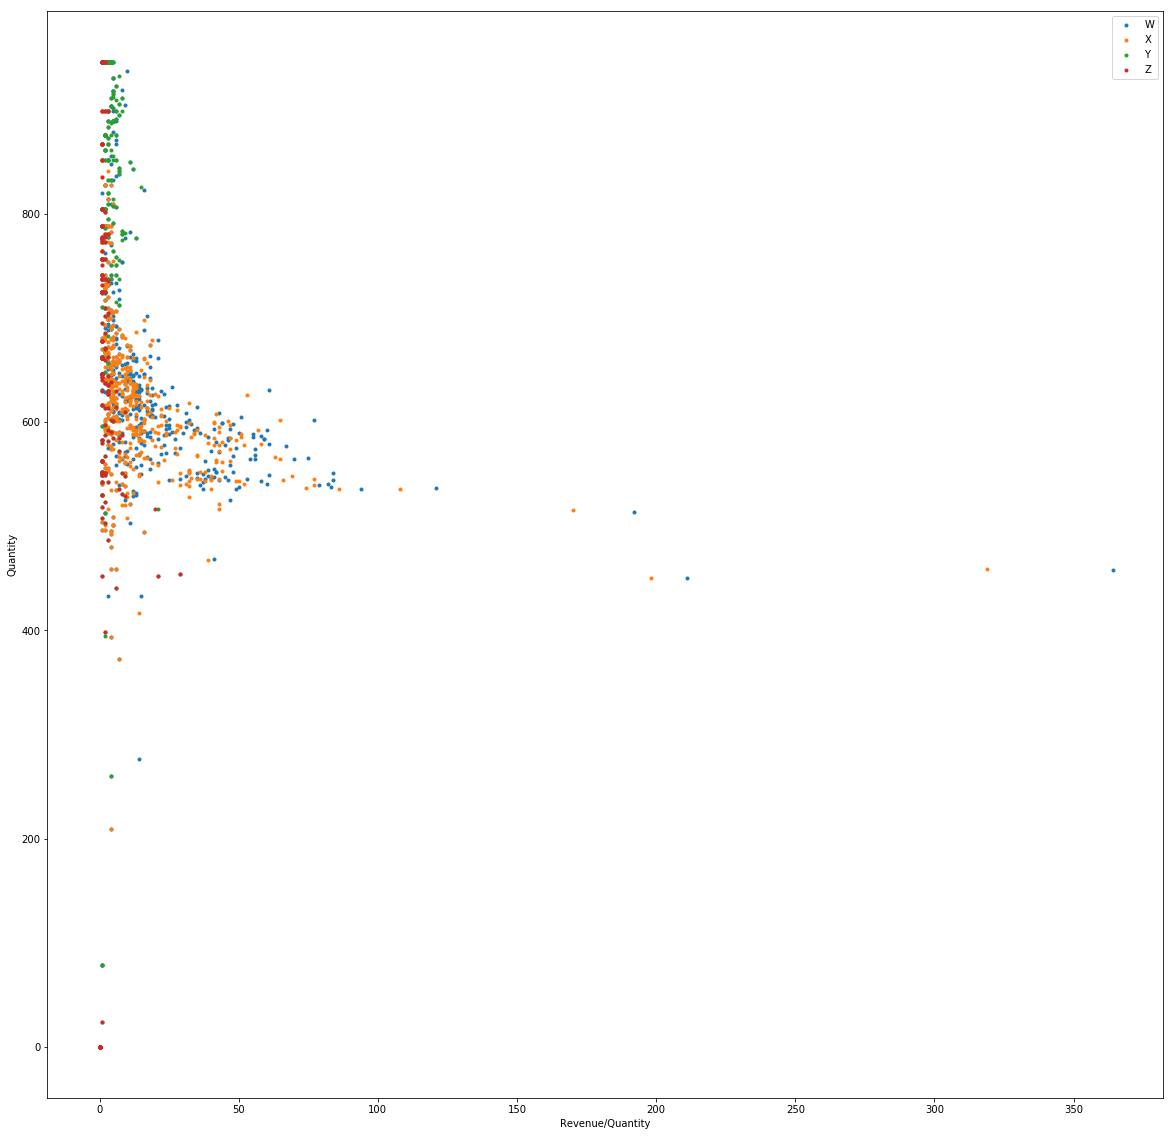

In [73]:
fig = plt.figure(figsize=[20,20])
fig.patch.set_facecolor('white')
ax = fig.gca()
dat = [[],[],[],[]]
for i in getData():
    if i[0] == "W":
        dat[0].append([i[3],i[8].replace("N/A","0")])
    elif i[0] == "X":
        dat[1].append([i[3],i[8].replace("N/A","0")])
    elif i[0] == "Y":
        dat[2].append([i[3],i[8].replace("N/A","0")])
    elif i[0] == "Z":
        dat[3].append([i[3],i[8].replace("N/A","0")])
dat = np.array(dat)
ax.scatter(dat[0,:,0],dat[0,:,1],marker='.', label = "W")
ax.scatter(dat[1,:,0],dat[1,:,1],marker='.', label = "X")
ax.scatter(dat[2,:,0],dat[2,:,1],marker='.', label = "Y")
ax.scatter(dat[3,:,0],dat[3,:,1],marker='.', label = "Z")
plt.xlabel("Revenue/Quantity")
plt.ylabel("Quantity")
plt.legend()
plt.show()